In [22]:
pip install ucimlrepo

You should consider upgrading via the '/Users/manikanr/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Team 7 : Manikandan Ramalingam & Muhammed Haris

In [33]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [2]:
import pandas as pd

#Fetch data from csv file with pandas
adultData = pd.read_csv('https://archive.ics.uci.edu/static/public/2/data.csv', sep=',')
adultData.head()
#print(adultData.count())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


No handles with labels found to put in legend.


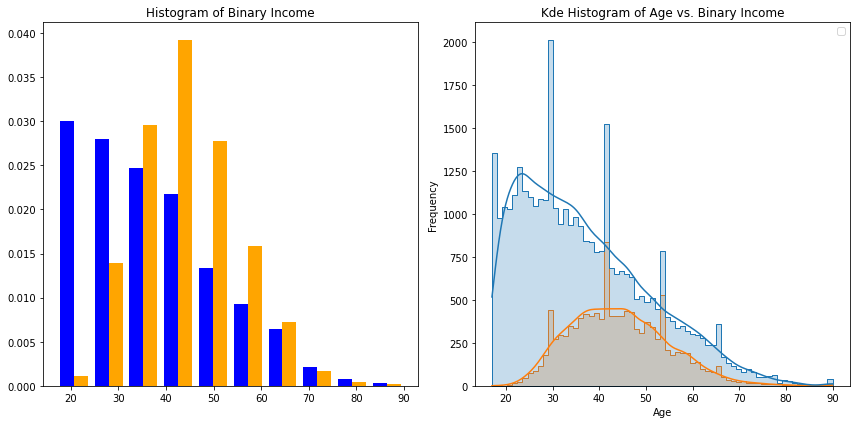

In [120]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Filter/cleanse the columns which has null values
filteredAdultData = adultData[adultData.notnull().all(axis=1)]

# Filter/cleanse the columns that are considered irrelvant
# Assumptions
# fnlwgt - Weightage is not considered to avoid bias
# education - Removed as eduction-num is equivalent
# marital status and relationship wasn't considered too

filteredAdultData = filteredAdultData.drop(columns=['fnlwgt', 'education', 'marital-status', 'relationship'])
filteredAdultData.head()

# Define a function to map income values to binary values
def incomeToBinary(income):
    if income == '<=50K' or income == '<=50K.':
        return 0
    elif income == '>50K' or income == '>50K.':
        return 1

# Apply the function to transform the 'income' column to binary
filteredAdultData['income'] = filteredAdultData['income'].apply(lambda x: incomeToBinary(x))

filteredAdultData.head()
# Drop the original 'income' column if needed
# df.drop(columns=['income'], inplace=True)

# Create KDE plot with histogram
#sns.histplot(data=filteredAdultData, x='age', hue='income', kde=True, element='step', fill=True)
# Separate data for income <= 50 and income > 50

# Create a figure and axes with two subplots
#fig, axs = plt.subplots(1, 2, figsize=(12, 6))

def plotHistogram(continuousVariable, yLabel, axis, axs):
    incomeZero = filteredAdultData[filteredAdultData['income'] == 0][continuousVariable]
    incomeOne = filteredAdultData[filteredAdultData['income'] == 1][continuousVariable]

    axs[axis].hist([incomeZero, incomeOne], bins=10, color=['blue', 'orange'], label=['Income <= 50', 'Income > 50'], density='true')
    axs[axis].set_title('Histogram of Binary Income')
    plt.xlabel(yLabel)
    plt.ylabel('Frequency')
    return plt

# Create a figure and axes with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plt = plotHistogram('age', 'Age', 0, axs)
sns.histplot(data=filteredAdultData, x='age', hue='income', kde=True, element='step', fill=True)
axs[1].set_title('Kde Histogram of Age vs. Binary Income')
# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Plot the relationships of other continuous variables of education (yrs), capital-gain and hours-per-week to income

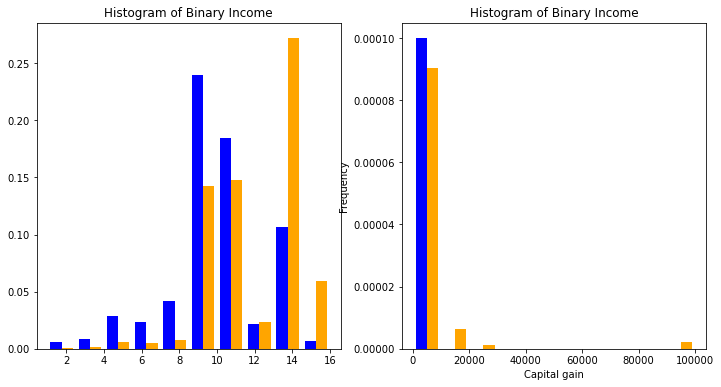

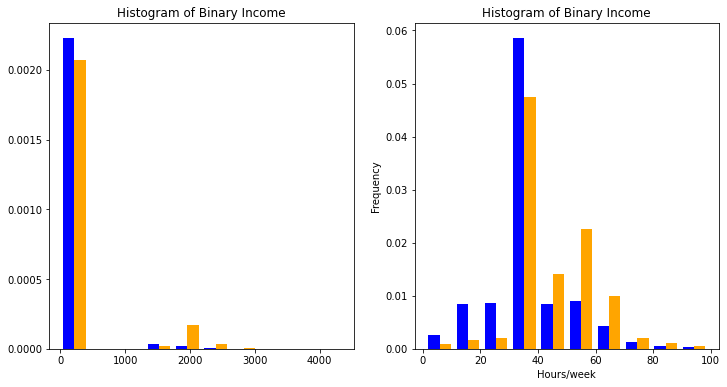

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt = plotHistogram('education-num', 'Education (yrs)', 0, axs)
plt = plotHistogram('capital-gain', 'Capital gain', 1, axs)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt = plotHistogram('capital-loss', 'Capital loss', 0, axs)
plt = plotHistogram('hours-per-week', 'Hours/week', 1, axs)

In [5]:
# Filter and cleanse the data by converting the categorical variables to numeric codes
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical variable with integer values
for column in ['workclass', 'occupation', 'race', 'sex', 'native-country']:
    filteredAdultData[column] = label_encoder.fit_transform(filteredAdultData[column])

# Describe the data set for continuous and discrete data
filteredAdultData.describe()
filteredAdultData.head()

,age,workclass,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,13,1,4,1,2174,0,40,39,0
1,50,6,13,4,4,1,0,0,13,39,0
2,38,4,9,6,4,1,0,0,40,39,0
3,53,4,7,6,2,1,0,0,40,39,0
4,28,4,13,10,2,0,0,0,40,5,0


### Plot the corresponding histograms on frequency distribution for other explanatory variables

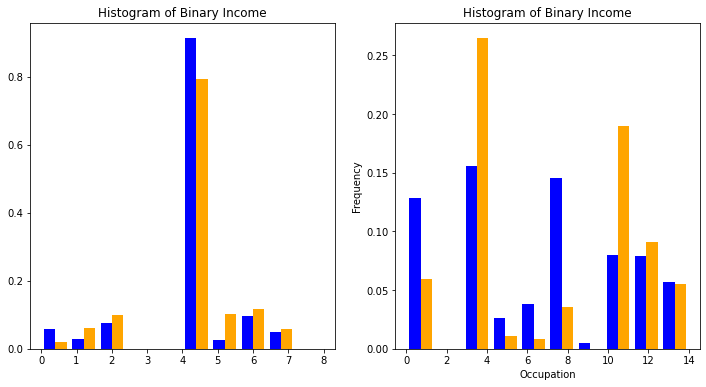

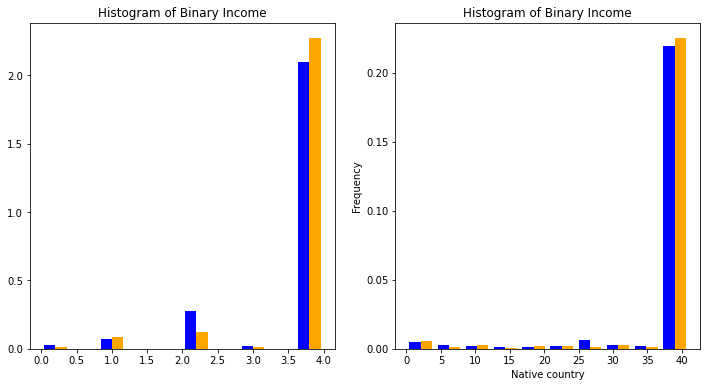

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt = plotHistogram('workclass', 'Workclass', 0, axs)
plt = plotHistogram('occupation', 'Occupation', 1, axs)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt = plotHistogram('race', 'Race', 0, axs)
plt = plotHistogram('native-country', 'Native country', 1, axs)

### Plot the correlation matrix of all explanatory variables against income

In [7]:
filteredAdultData.corr()

,age,workclass,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.019250,0.033327,-0.014986,0.027481,0.086811,0.078006,0.057772,0.079306,-0.002065,0.231986
workclass,0.019250,1.000000,0.041272,0.196509,0.055403,0.085466,0.033021,0.011103,0.114724,-0.004796,0.035898
education-num,0.033327,0.041272,1.000000,0.104945,0.031123,0.007802,0.125569,0.081799,0.143727,0.062447,0.332845
occupation,-0.014986,0.196509,0.104945,1.000000,0.004717,0.069735,0.022018,0.017622,0.060587,-0.007589,0.066642
race,0.027481,0.055403,0.031123,0.004717,1.000000,0.087625,0.011930,0.017947,0.040628,0.133863,0.071068
sex,0.086811,0.085466,0.007802,0.069735,0.087625,1.000000,0.047300,0.045509,0.230097,-0.009341,0.215325
capital-gain,0.078006,0.033021,0.125569,0.022018,0.011930,0.047300,1.000000,-0.031691,0.082279,0.000272,0.222509
capital-loss,0.057772,0.011103,0.081799,0.017622,0.017947,0.045509,-0.031691,1.000000,0.055360,0.000140,0.149078
hours-per-week,0.079306,0.114724,0.143727,0.060587,0.040628,0.230097,0.082279,0.055360,1.000000,0.000418,0.227527
native-country,-0.002065,-0.004796,0.062447,-0.007589,0.133863,-0.009341,0.000272,0.000140,0.000418,1.000000,0.015395


### Let's try to calculate Probability for few scenarios

#### 1. Probability of getting income >50K for the whole sample

In [20]:
sampleProbForIncomeGreaterThanFifty = filteredAdultData[filteredAdultData['income'] == 1].count()/filteredAdultData.count()
print("\nProbability of income >50K in sample is {}".format(round(sampleProbForIncomeGreaterThanFifty['income'], 2)))

print("\nProbability of income <=50K in sample is {}\n".format(round(1 - sampleProbForIncomeGreaterThanFifty['income'], 2)))
print("From above, sample probability of getting income > 50K is only 24%\n")


Probability of income >50K in sample is 0.24

Probability of income <=50K in sample is 0.76

From above sample probability of getting income > 50K is only 24%



#### 2. Probability of getting income >50k  or <=50k if we take samples after and before mean age

In [47]:
print("\nThe mean age of sample is {}".format(round(filteredAdultData['age'].mean(), 0)))

# Filter the data with age >= 39 and income > 50K
def probabilityBasedOnAge(age, income, incomeRange, ageRange, filteredAdultDataAgeGrThanMean, count,
                          dataType):
    sampleProbForIncGrThanFiftyAfterMeanAge = filteredAdultDataAgeGrThanMean[dataType].count()/count
    print("\nProbability of income {} if {} is {} in sample is {}".format(incomeRange, dataType, ageRange, round(sampleProbForIncGrThanFiftyAfterMeanAge['income'], 2)))
    print("From above, sample probability of getting income {} if the {} is {} is {}%\n".format(incomeRange, dataType, ageRange,
                                                                                         round(sampleProbForIncGrThanFiftyAfterMeanAge['income'], 2)*100))

# Filter the data with age >= 39 and income > 50K
filteredAdultDataAgeGrThanMean = filteredAdultData[(filteredAdultData['age'] >= 39) 
                                                   & (filteredAdultData['income'] == 1)]
countOfAllDataGreater = filteredAdultData[filteredAdultData['age'] >= 39].count()
probabilityBasedOnAge(39, 1, '>50K', '>=39', filteredAdultDataAgeGrThanMean, countOfAllDataGreater, 'age')

# Filter the data with age >= 39 and income < 50K. This should be (1-p)
filteredAdultDataAgeGrThanMean = filteredAdultData[(filteredAdultData['age'] >= 39) 
                                                   & (filteredAdultData['income'] == 0)]
probabilityBasedOnAge(39, 0, '<50K', '>=39', filteredAdultDataAgeGrThanMean, countOfAllDataGreater, 'age')

# Filter the data with age < 39 and income > 50K
filteredAdultDataAgeGrThanMean = filteredAdultData[(filteredAdultData['age'] < 39) 
                                                   & (filteredAdultData['income'] == 1)]
countOfAllDataLesser = filteredAdultData[filteredAdultData['age'] < 39].count()
probabilityBasedOnAge(39, 1, '>50K', '<39', filteredAdultDataAgeGrThanMean, countOfAllDataLesser, 'age')

# Filter the data with age >= 39 and income < 50K. This should be (1-p)
filteredAdultDataAgeGrThanMean = filteredAdultData[(filteredAdultData['age'] < 39) 
                                                   & (filteredAdultData['income'] == 0)]
probabilityBasedOnAge(39, 0, '<50K', '<39', filteredAdultDataAgeGrThanMean, countOfAllDataLesser, 'age')



The mean age of sample is 39.0

Probability of income >50K if age is >=39 in sample is 0.35
From above, sample probability of getting income >50K if the age is >=39 is 35.0%


Probability of income <50K if age is >=39 in sample is 0.65
From above, sample probability of getting income <50K if the age is >=39 is 65.0%


Probability of income >50K if age is <39 in sample is 0.15
From above, sample probability of getting income >50K if the age is <39 is 15.0%


Probability of income <50K if age is <39 in sample is 0.85
From above, sample probability of getting income <50K if the age is <39 is 85.0%



### Probability based on Number of years of Education

#### Probability of getting income >50k  or <=50k if we take samples after and before mean years of education

In [45]:
print("\nThe mean number of years of education of sample is {}".format(round(filteredAdultData['education-num'].mean(), 0)))
filteredAdultData['education-num'].describe()


The mean number of years of education of sample is 10.0


count    47621.000000
mean        10.090821
std          2.568320
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [50]:
# Filter the data with number of years of education >= 10 and income > 50K
filteredAdultDataAgeGrThanMean = filteredAdultData[(filteredAdultData['education-num'] >= 10) 
                                                   & (filteredAdultData['income'] == 1)]
countOfAllDataGreater = filteredAdultData[filteredAdultData['education-num'] >= 10].count()
probabilityBasedOnAge(39, 1, '>50K', '>=10', filteredAdultDataAgeGrThanMean, countOfAllDataGreater, 'education-num')

# Filter the data with number of years of education >= 10 and income < 50K. This should be (1-p)
filteredAdultDataAgeGrThanMean = filteredAdultData[(filteredAdultData['education-num'] >= 10) 
                                                   & (filteredAdultData['income'] == 0)]
probabilityBasedOnAge(39, 0, '<50K', '>=10', filteredAdultDataAgeGrThanMean, countOfAllDataGreater, 'education-num')

# Filter the data with number of years of education < 10 and income > 50K
filteredAdultDataAgeGrThanMean = filteredAdultData[(filteredAdultData['education-num'] < 10) 
                                                   & (filteredAdultData['income'] == 1)]
countOfAllDataLesser = filteredAdultData[filteredAdultData['education-num'] < 10].count()
probabilityBasedOnAge(39, 1, '>50K', '<10', filteredAdultDataAgeGrThanMean, countOfAllDataLesser, 'education-num')

# Filter the data with number of years of education < 10 and income < 50K. This should be (1-p)
filteredAdultDataAgeGrThanMean = filteredAdultData[(filteredAdultData['education-num'] < 10) 
                                                   & (filteredAdultData['income'] == 0)]
probabilityBasedOnAge(39, 0, '<50K', '<10', filteredAdultDataAgeGrThanMean, countOfAllDataLesser, 'education-num')


Probability of income >50K if education-num is >=10 in sample is 0.33
From above, sample probability of getting income >50K if the education-num is >=10 is 33.0%


Probability of income <50K if education-num is >=10 in sample is 0.67
From above, sample probability of getting income <50K if the education-num is >=10 is 67.0%


Probability of income >50K if education-num is <10 in sample is 0.13
From above, sample probability of getting income >50K if the education-num is <10 is 13.0%


Probability of income <50K if education-num is <10 in sample is 0.87
From above, sample probability of getting income <50K if the education-num is <10 is 87.0%



### Joint probability Distribution

#### Joint probability distribution of income >50K when Age > 39 and Education > 10

In [55]:
# Assuming these are independent events, the probability of both events occurring P(A n B) = P(A) * P(B)
print("\nThe joint probability distribution of income >50K with Age >=39 and education >= 10 years is {}".format(round(0.35*0.33, 2)))


The joint probability distribution of income >50K with Age >=39 and education >= 10 years is 0.12


#### Joint probability distribution of income >50K when Age > 39 or Education  > 10

In [56]:
# Assuming these are independent events, the probability of either events occurring P(A U B) = P(A) + P(B) - P(A n B)
print("\nThe joint probability distribution of income >50K with Age >=39 or education >= 10 years is {}".format(round(0.35+0.33-0.11, 2)))


The joint probability distribution of income >50K with Age >=39 or education >= 10 years is 0.57


#### Joint probability distribution of income <50K when Age < 39 and Education < 10

In [57]:
# Assuming these are independent events, the probability of both events occurring P(A n B) = P(A) * P(B)
print("\nThe joint probability distribution of income <50K with Age <39 and education < 10 years is {}".format(round(0.87*0.85, 2)))


The joint probability distribution of income <50K with Age <39 and education < 10 years is 0.74


#### Joint probability distribution of income <50K when Age < 39 or Education  < 10

In [58]:
# Assuming these are independent events, the probability of either events occurring P(A U B) = P(A) + P(B) - P(A n B)
print("\nThe joint probability distribution of income <50K with Age <39 or education < 10 years is {}".format(round(0.87+0.85-0.74, 2)))


The joint probability distribution of income <50K with Age <39 or education < 10 years is 0.98


### If time permits, add Bayesian inference here with posterior probability based on prior probabilities

### Normal Distribution of Population Sample

#### 1. Population Distribution of income >50K if education-num is >=10 in sample is 0.33

People with income >50K when sample gets used was [8566]
Mean of the sample [2826.78]
People with income >50K when multiple samples selected randomly were used was 0.32999500819104755
Standard Deviation 0.0029
Standard Error 1.808e-05


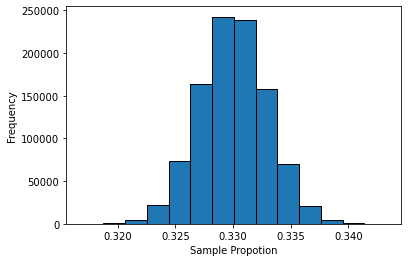

In [65]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
import math

# Count of all observations with inceome > 50K and eductation-num >=10
noOfObs = countOfAllDataGreater
proportionInThatSample = 0.33

def plotNormal(countInSample, sampleProportion, incomeRange):
   # Do binomial distribution for a single random sample
   y1 = np.random.binomial(countInSample, sampleProportion, 1)
   print("People with income {} when sample gets used was {}".format(incomeRange, y1))
   print("Mean of the sample {}".format(y1*sampleProportion))

   # Do binomial distribution for multiple samples randomly selected with each sample size a million times
   y2 = np.random.binomial(countInSample, sampleProportion, 1000000)/countInSample
   print("People with income {} when multiple samples selected randomly were used was {}"
         .format(incomeRange, statistics.mean(y2)))
   print("Standard Deviation {}".format(round(statistics.stdev(y2), 4)))
   print("Standard Error {}".format(round(statistics.stdev(y2)/math.sqrt(countInSample), 8)))
   plt.hist(y2, bins=14, edgecolor='black')
   plt.xlabel('Sample Propotion')
   plt.ylabel('Frequency')
   plt.show()
plotNormal(countOfAllDataGreater['income'], 0.33, '>50K')

#### 2. Population Distribution of income <50K if education-num is >=10 in sample is (1-0.33) = 0.67

People with income <50K when sample gets used was [17331]
Mean of the sample [11611.77]
People with income <50K when multiple samples selected randomly were used was 0.6699987483848638
Standard Deviation 0.0029
Standard Error 1.811e-05


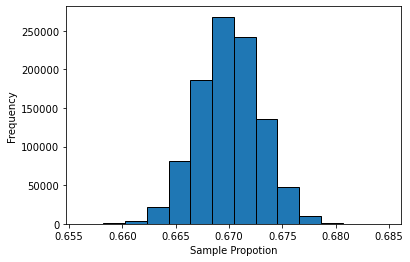

In [66]:
plotNormal(countOfAllDataGreater['income'], 0.67, '<50K')

#### 3. Probability of income >50K if age is >=39 in sample is 0.35

People with income >50K when sample gets used was [9059]
Mean of the sample [3170.65]
People with income >50K when multiple samples selected randomly were used was 0.3500013304876173
Standard Deviation 0.003
Standard Error 1.834e-05


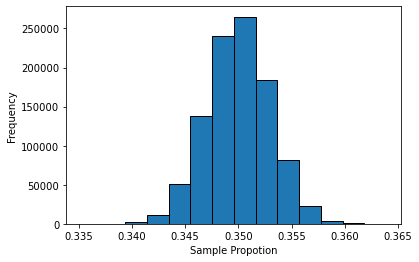

In [67]:
plotNormal(countOfAllDataGreater['income'], 0.35, '>50K')

#### 4. Probability of income <50K if age is >=39 in sample is (1-0.35) = 0.65

People with income <50K when sample gets used was [16821]
Mean of the sample [10933.65]
People with income <50K when multiple samples selected randomly were used was 0.6500036805491463
Standard Deviation 0.003
Standard Error 1.831e-05


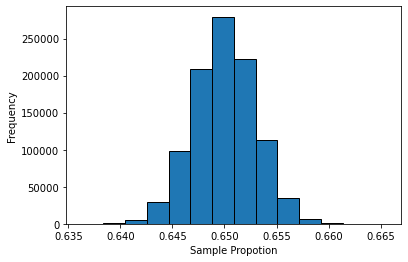

In [68]:
plotNormal(countOfAllDataGreater['income'], 0.65, '<50K')

### Maximum Likelihood Estimates of Population Proportion

### Finding the confidence intervals and standard errors for population proportion

#### Wald and Score confidence intervals for income >50K if education-num is >=10 for 95% confidence level

In [75]:
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

def findIntervals(sampleFilteredCount, sampleTotalCount):
    # Find 95% Wald and Score Confidence interval
    print("\nThe confidence interval is {}".format(proportion_confint(sampleFilteredCount, # Number of students believe
                   sampleTotalCount, # Total Number of students
                   alpha=0.05, method="normal")))
    print("\nThe Score confidence interval is {}".format(proportion_confint(sampleFilteredCount, # Number of students believe
                   sampleTotalCount, # Total Number of students
                   alpha=0.05, method="wilson")))

filteredData = filteredAdultData[(filteredAdultData['education-num'] >= 10) 
                                                   & (filteredAdultData['income'] == 1)]
findIntervals(filteredData['income'].count(), countOfAllDataGreater['income'])


The confidence interval is (0.329212000349972, 0.34068493858249993)

The Score confidence interval is (0.32923675095889376, 0.34070894547303027)


#### Wald and Score confidence intervals for income <50K if education-num is >=10 for 95% confidence level

In [79]:
filteredData2 = filteredAdultData[(filteredAdultData['education-num'] >= 10) 
                                                   & (filteredAdultData['income'] == 0)]
findIntervals(filteredData2['income'].count(), countOfAllDataGreater['income'])


The confidence interval is (0.6593150614175001, 0.6707879996500281)

The Score confidence interval is (0.6592910545269699, 0.6707632490411064)


#### Wald and Score confidence intervals for income >50K if education-num is <10 for 95% confidence level

In [80]:
filteredData3 = filteredAdultData[(filteredAdultData['education-num'] < 10) 
                                                   & (filteredAdultData['income'] == 1)]
findIntervals(filteredData3['income'].count(), countOfAllDataLesser['income'])


The confidence interval is (0.12646454463750048, 0.13545894150766305)

The Score confidence interval is (0.12653003462600917, 0.1355245884381265)


#### Wald and Score confidence intervals for income <50K if education-num is <10 for 95% confidence level

In [95]:
filteredData4 = filteredAdultData[(filteredAdultData['education-num'] < 10) 
                                                   & (filteredAdultData['income'] == 0)]
findIntervals(filteredData3['income'].count(), countOfAllDataLesser['income'])


The confidence interval is (0.864541058492337, 0.8735354553624994)

The Score confidence interval is (0.8644754115618736, 0.8734699653739908)


### Hypothetical Sample size required to get the confidence level of 95% and standard error within 0.05

In [86]:
zScore = 1.96
propotion = 0.33
stdError = 0.05
print("\nThe approximate sample size to be used is {}".format(round(zScore**2*propotion*(1-propotion)/(stdError**2),0)))


The approximate sample size to be used is 340.0


### Standard Error, Margin of Error, upper and lower quantile

In [88]:
# The standard error, margin of error can be obtained by se = sqrt(p(1-p)/n) and me = z-score * se
def findErrorValues(proportion, totalCount):
    se = math.sqrt(proportion*(1-proportion)/totalCount)
    zScore = 1.96 # 95% confidence interval
    print("\nThe standard error is {}".format(se))
    me = se*1.96
    print("The margin of error is {}\n".format(me))
    print("The lower quantile is {}".format(proportion - me))
    print("The upper quantile is {}".format(proportion + me))
    

#### For income >50K if education-num is >=10 for 95% confidence level

In [89]:
findErrorValues(0.33, filteredData['income'].count())


The standard error is 0.005038314736557789
The margin of error is 0.009875096883653267

The lower quantile is 0.3201249031163467
The upper quantile is 0.3398750968836533


#### For income <50K if education-num is >=10 for 95% confidence level

In [91]:
findErrorValues(0.67, filteredData2['income'].count())


The standard error is 0.003575581190359032
The margin of error is 0.007008139133103703

The lower quantile is 0.6629918608668963
The upper quantile is 0.6770081391331038


#### For income >50K if education-num is <10 for 95% confidence level

In [93]:
findErrorValues(0.13, filteredData3['income'].count())


The standard error is 0.0024536586465425045
The margin of error is 0.004809170947223309

The lower quantile is 0.1251908290527767
The upper quantile is 0.1348091709472233


#### For income <50K if education-num is <10 for 95% confidence level

In [96]:
findErrorValues(0.87, filteredData4['income'].count())


The standard error is 0.0024536586465425045
The margin of error is 0.004809170947223309

The lower quantile is 0.8651908290527767
The upper quantile is 0.8748091709472233


### Significance Tests, P-value,  Z-test and Chi-squared Tests

#### Z-test for education >= 10 years the proportion of income > 50K, H0: Proportion to be 0.20 Ha: Proportion not equal to 0.20

In [113]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

def proportionCheck(successCount, totCount, state, piValue):
    stat, pVal = proportions_ztest(successCount, totCount, piValue)
    print("\nFor income {}, the z-test is {}, one-sided P-value assuming distribution " 
          "as symmetric and normal is {}".format(state, round(stat, 2), pVal/2)) # Divide by 2 assuming symmetric and normal
    confidenceInterval = proportion_confint(successCount, totCount)
    print("\nFor income {}, the confidence interval is between {} - {}".format(state, round(confidenceInterval[0], 2), 
                                                                   round(confidenceInterval[1], 2)))
proportionCheck(filteredData['income'].count(), countOfAllDataGreater['income'], ">50K", 0.20)
#proportionCheck(stateBSuccessCount, stateBTotCount, "B")
print("\nSince the P-value is so low, the H0 can be rejected that population proportion getting income is not equal"
      " to 0.20. Infact, from confidence interval, it is in narrow range of 0.32 - 0.34.\n")

proportionCheck(filteredData['income'].count(), countOfAllDataGreater['income'], ">50K", 0.60) # High value check

print("\nSince the P-value is so low, the H0 can be rejected that population proportion getting income is not equal"
      " to 0.60. Infact, from confidence interval, it is in narrow range of 0.32 - 0.34.\n")


For income >50K, the z-test is 46.11, one-sided P-value assuming distribution as symmetric and normal is 0.0

For income >50K, the confidence interval is between 0.33 - 0.34

Since the P-value is so low, the H0 can be rejected that population proportion getting income is not equal to 0.20. Infact from confidence interval, it is in narrow range of 0.32 - 0.34.


For income >50K, the z-test is -90.56, one-sided P-value assuming distribution as symmetric and normal is 0.0

For income >50K, the confidence interval is between 0.33 - 0.34


#### Chi-squared Test for the association between number of years of education and income. H0: No relation between education and income Ha: Significant relationship between education and income

In [105]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table (cross-tabulation)
contingencyTable = pd.crosstab(filteredAdultData['education-num'], filteredAdultData['income'])
print(contingencyTable)

income             0     1
education-num             
1                 77     1
2                231     8
3                468    26
4                852    60
5                695    40
6               1251    85
7               1656    90
8                586    47
9              12970  2474
10              8471  2041
11              1513   521
12              1159   407
13              4608  3273
14              1176  1434
15               210   609
16               157   425


In [110]:
# Perform the chi-squared test for independence
def chiSquaredTest(contingencyTable):
    chi2Stat, pVal, dof, expected = chi2_contingency(contingencyTable)

    # Output the results
    print("Chi-squared statistic:", chi2Stat)
    print("p-value:", pVal)
    print("Degrees of freedom:", dof)
    print("Expected frequencies:\n", expected)
contingencyTable = pd.crosstab(filteredAdultData['education-num'], filteredAdultData['income'])
chiSquaredTest(contingencyTable)

#### Chi-squared Test for the association between age and income. H0: No relation between age and income Ha: Significant relationship between age and income

In [112]:
contingencyTableAge = pd.crosstab(filteredAdultData['age'], filteredAdultData['income'])
chiSquaredTest(contingencyTableAge)

Chi-squared statistic: 5003.703068883917
p-value: 0.0
Degrees of freedom: 73
Expected frequencies:
 [[4.24283404e+02 1.35716596e+02]
 [6.04603851e+02 1.93396149e+02]
 [7.44011256e+02 2.37988744e+02]
 [7.87954894e+02 2.52045106e+02]
 [7.83409000e+02 2.50591000e+02]
 [8.52355053e+02 2.72644947e+02]
 [9.80397724e+02 3.13602276e+02]
 [8.90995149e+02 2.85004851e+02]
 [8.90237500e+02 2.84762500e+02]
 [8.57658596e+02 2.74341404e+02]
 [9.11451670e+02 2.91548330e+02]
 [9.52364713e+02 3.04635287e+02]
 [9.06148128e+02 2.89851872e+02]
 [9.56910607e+02 3.06089393e+02]
 [9.93277756e+02 3.17722244e+02]
 [9.35696436e+02 2.99303564e+02]
 [9.97823649e+02 3.19176351e+02]
 [9.72821234e+02 3.11178766e+02]
 [1.00009660e+03 3.19903404e+02]
 [1.00691544e+03 3.22084564e+02]
 [9.53880011e+02 3.05119989e+02]
 [9.44788224e+02 3.02211776e+02]
 [9.08421075e+02 2.90578925e+02]
 [8.88722202e+02 2.84277798e+02]
 [9.19028160e+02 2.93971840e+02]
 [8.72811575e+02 2.79188425e+02]
 [8.27352639e+02 2.64647361e+02]
 [7.99319

#### Find estmated expected frequencies, standardized residuals and the corresponding Mosaic plot



income                   0            1
education                              
10th           1012.218979   323.781021
11th           1322.855043   423.144957
12th            479.591777   153.408223
1st-4th         181.078096    57.921904
5th-6th         374.278575   119.721425
7th-8th         690.975830   221.024170
9th             556.871968   178.128032
Assoc-acdm     1186.478234   379.521766
Assoc-voc      1541.057937   492.942063
Bachelors      5971.031268  1909.968732
Doctorate       440.951681   141.048319
HS-grad       11701.130174  3742.869826
Masters        1977.463724   632.536276
Preschool        59.096617    18.903383
Prof-school     620.514479   198.485521
Some-college   7964.405619  2547.594381

From the mosaic plot below,


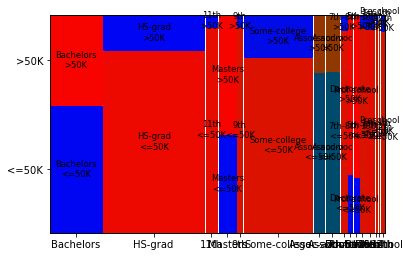

In [119]:
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

filteredAdultDataNew = adultData[adultData.notnull().all(axis=1)]

# Filter/cleanse the columns that are considered irrelvant
# Assumptions
# fnlwgt - Weightage is not considered to avoid bias
# education - Removed as eduction-num is equivalent
# marital status and relationship wasn't considered too

filteredAdultDataNew = filteredAdultDataNew.drop(columns=['fnlwgt', 'marital-status', 'relationship'])
filteredAdultDataNew.head()

# Define a function to map income values to binary values
def incomeToBinary(income):
    if income == '<=50K' or income == '<=50K.':
        return 0
    elif income == '>50K' or income == '>50K.':
        return 1

# Apply the function to transform the 'income' column to binary
filteredAdultDataNew['income'] = filteredAdultDataNew['income'].apply(lambda x: incomeToBinary(x))

filteredAdultDataNew.head()

# Table on Propotions expected frequencies
crossPropTable = pd.crosstab(filteredAdultDataNew['education'], filteredAdultDataNew['income'], normalize='index')
crossPropTable
crossTable = pd.crosstab(filteredAdultDataNew['education'], filteredAdultDataNew['income'], margins=False)
resultH0Table = sm.stats.Table(crossTable)
print("\n")
print(resultH0Table.fittedvalues)

# Calculate Residuals
resultH0Table.standardized_resids

# Mosaic Plot
# First convert the numeric values to strings
filteredAdultDataNew.loc[filteredAdultDataNew['income'] == 0, 'income'] = '<=50K'
filteredAdultDataNew.loc[filteredAdultDataNew['income'] == 1, 'income'] = '>50K'
fig, _ = mosaic(filteredAdultDataNew, ['education','income'], statistic=True)
print("\nFrom the mosaic plot below,")

### Scatterplot and Regression Model fit

#### Regression Model Fit between number of years of education and income

In [125]:


# Add a constant term for the intercept
filteredAdultData['intercept'] = 1

# Define the independent variable (X) and dependent variable (y)
X = filteredAdultData[['education-num', 'intercept']]
y = filteredAdultData['income']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Calculate the predicted probabilities
predictedProbs = model.predict(X)

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.492559
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                47621
Model:                          Logit   Df Residuals:                    47619
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Feb 2024   Pseudo R-squ.:                  0.1105
Time:                        22:13:13   Log-Likelihood:                -23456.
converged:                       True   LL-Null:                       -26371.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
education-num     0.3608      0.005     69.760      0.000       0.351       0.371
intercept        -4.

In [146]:
# Define the logistic regression equation
def logistic_regression(education, intercept, coefEducation):
    # Calculate the log odds (logit)
    logOdds = intercept + coefEducation * education
    # Calculate the probability of high income (1) using the logistic function
    probability = np.exp(logOdds) / (1 + np.exp(logOdds))
    return probability

# Example values (replace with your data)
intercept = -4.97
coefEducation = 0.36

# Calculate probabilities for each education value
probabilities = [logistic_regression(education, intercept, coefEducation) 
                 for education in filteredAdultData['education-num']]
count = 0
# Output the probabilities
for education, prob in zip(filteredAdultData['education-num'], probabilities):
    if prob > 0.60:
       count += 1 
print("The number of entries with probability greater than 60% is {}".format(count))      

The number of entries with probability greater than 60% is 1401


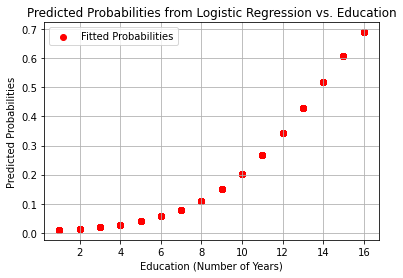

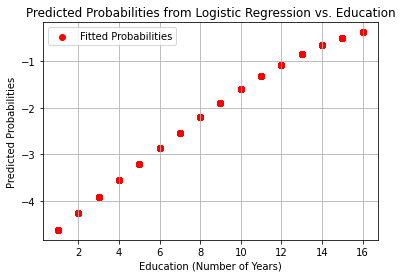

In [140]:
import matplotlib.pyplot as plt

# Calculate the predicted probabilities
predictedProbs = model.predict(X)

# Plot the logistic regression curve
plt.scatter(filteredAdultData['education-num'], predictedProbs, color='red', label='Fitted Probabilities')
plt.xlabel('Education (Number of Years)')
plt.ylabel('Predicted Probabilities')
plt.title('Predicted Probabilities from Logistic Regression vs. Education')
plt.grid(True)
plt.legend()
plt.show()

# Plot the logistic regression curve
plt.scatter(filteredAdultData['education-num'], np.log(predictedProbs), color='red', label='Fitted Probabilities')
plt.xlabel('Education (Number of Years)')
plt.ylabel('Predicted Probabilities')
plt.title('Predicted Probabilities from Logistic Regression vs. Education')
plt.grid(True)
plt.legend()
plt.show()

#### Generalised Models Regression Fitting

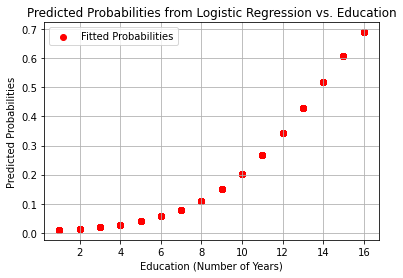

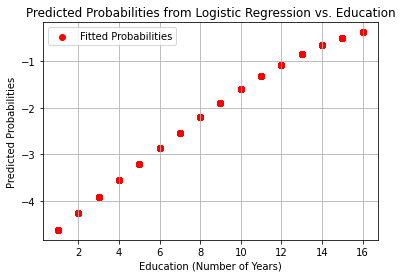

In [144]:
# Fit the logistic regression model using glm()
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Calculate the predicted probabilities
predictedProbs = model.predict(X)

# Plot the logistic regression curve
plt.scatter(filteredAdultData['education-num'], predictedProbs, color='red', label='Fitted Probabilities')
plt.xlabel('Education (Number of Years)')
plt.ylabel('Predicted Probabilities')
plt.title('Predicted Probabilities from Logistic Regression vs. Education')
plt.grid(True)
plt.legend()
plt.show()

# Plot the logistic regression curve
plt.scatter(filteredAdultData['education-num'], np.log(predictedProbs), color='red', label='Fitted Probabilities')
plt.xlabel('Education (Number of Years)')
plt.ylabel('Predicted Probabilities')
plt.title('Predicted Probabilities from Logistic Regression vs. Education')
plt.grid(True)
plt.legend()
plt.show()